In [23]:
import requests
import torch
import matplotlib.pyplot as plt
import numpy as np

In [24]:
r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

with open("iris.data", "wb") as f:
    f.write(r.content)

In [25]:
vectors = []
answers = []

with open("iris.data", "r") as f:
    for line in f:
        try:
            items = line.strip().split(",")
            vectors.append([float(i) for i in items[0:4]])
            answers.append(items[4])
        except:
            pass
species = {a: i for i, a in enumerate(set(answers))}

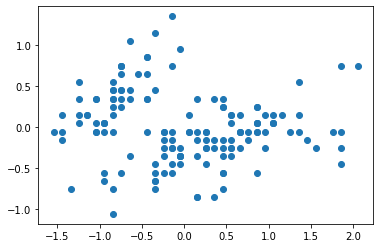

In [26]:
X = torch.tensor(vectors)

z = X - X.mean(axis=0)

plt.scatter(z[:,0], z[:,1])
plt.show()

In [27]:
def findPC(z): 
    w = torch.randn(z.shape[1]) 
    w = w / (w * w).sum() ** 0.5 
    
    lr = 0.1

    for epoch in range(1000):
        w.requires_grad_(True)
        var = ((z * w).sum(dim=1) ** 2).mean()
        var.backward()

        with torch.no_grad():
            w = w + lr * w.grad
            w = w / ((w * w).sum() ** 0.5)
            
    return w, var.item()

In [28]:
def PCA(z, n):
    W = []
    V = []

    for _ in range(n):
        w, v = findPC(z)
        W.append(w)
        V.append(v)
        z = z - (z @ w.view(-1,1) * w) # Matrix Mul

    return W , V

In [29]:
def transform(z, w):
    return z @ torch.stack(w).T

In [30]:
findPC(z)

(tensor([-0.3616,  0.0823, -0.8566, -0.3588]), 4.196674823760986)

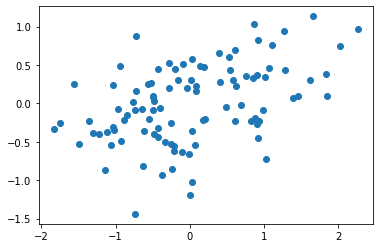

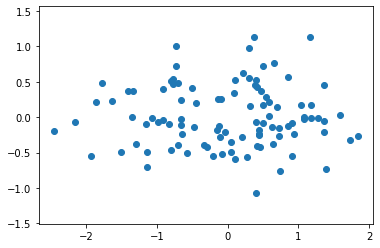

In [31]:
a = torch.randn(100, 2)
cov = torch.tensor([[1, 0.2],[0.2, 0.5]])

a = a @ cov
W, V = PCA(a, 2)

a_T = transform(a, W)

plt.scatter(a[:,0], a[:,1])
plt.show()

plt.scatter(a_T[:,0], a_T[:,1])
plt.axis('equal')
plt.show()

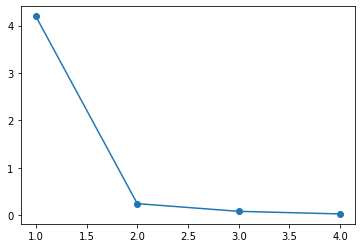

In [32]:
w , v = PCA(z, 4)

plt.plot(range(1,5), v, "-o")
plt.show()

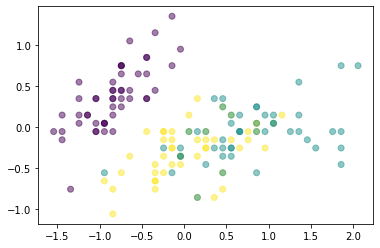

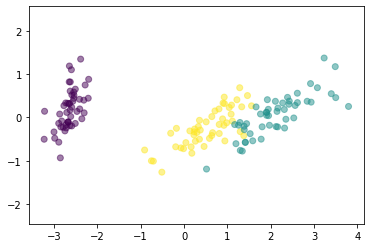

In [33]:
z_T = transform(z, w)

plt.scatter(z[:,0], z[:,1], c=[species[a] for a in answers], alpha=0.5)
plt.show()

plt.scatter(z_T[:,0], z_T[:,1], c=[species[a] for a in answers], alpha=0.5)
plt.axis("equal")
plt.show()